In [ ]:
pip install opencv-python

In [ ]:
pip install tensorflow

In [ ]:
pip install joblib

In [ ]:
pip install matplotlib

In [ ]:
pip install seaborn

In [ ]:
import pandas as pd

# Load the e-nose dataset
e_nose_df = pd.read_excel("/content/Molen_Dataset.xlsx")


In [ ]:
# Filter and normalize sensor readings
e_nose_df = e_nose_df.dropna()  # Remove missing values


In [ ]:
e_nose_df.iloc[:, 1:] = (e_nose_df.iloc[:, 1:] - e_nose_df.iloc[:, 1:].mean()) / e_nose_df.iloc[:, 1:].std()  # Normalize

In [ ]:

e_nose_df.head()

,Label,S1,S2,S3,S4,S5,S6,S7
0,0,1.595730,2.163924,3.858559,3.803137,-1.549394,1.002122,-1.600130
1,0,1.593003,2.157205,3.858559,3.803137,-1.546866,1.002122,-1.597436
2,0,1.590276,2.150495,3.858559,3.803137,-1.544339,1.002122,-1.594741
3,0,1.587549,2.143792,3.858559,3.803137,-1.541811,1.002122,-1.592045
4,0,1.584823,2.137096,3.858559,3.803137,-1.539283,1.002122,-1.589347


In [ ]:
e_nose_df.isnull().sum()

Label    0
S1       0
S2       0
S3       0
S4       0
S5       0
S6       0
S7       0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Split the data into training and testing sets
X = e_nose_df.iloc[:, 1:].values
y = e_nose_df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print("Data preprocessing completed.")

Data preprocessing completed.


In [ ]:
# Train a RandomForest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Evaluate the model
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [ ]:
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [ ]:
print(f"Precision: {precision}")

Precision: 1.0


In [ ]:
print(f"Recall: {recall}")

Recall: 1.0


In [ ]:
print(f"F1 Score: {f1}")

F1 Score: 1.0


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

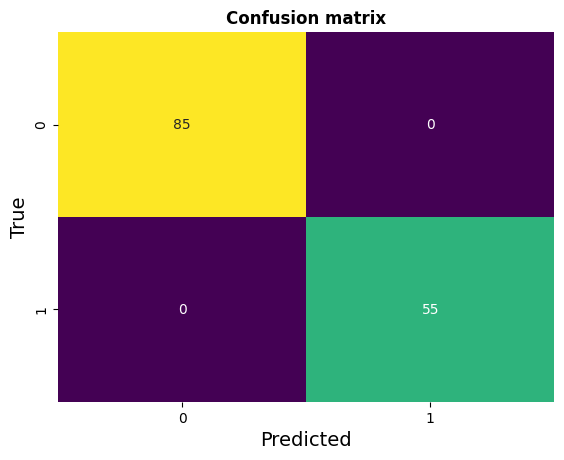

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='viridis', cbar=None)
plt.title("Confusion matrix", fontweight='bold')
plt.ylabel("True", fontsize=14)
plt.xlabel("Predicted", fontsize=14)
plt.show()

In [ ]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        55

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



In [ ]:
import joblib

In [ ]:
# Save the model
joblib.dump(rf_classifier, 'e_nose_model.pkl')
print("Model saved.")

Model saved.


In [ ]:
# Load the model
rf_classifier = joblib.load('e_nose_model.pkl')
print("Model loaded.")

Model loaded.


In [ ]:
# Function to make a prediction
def predict_meat_freshness(input_data):
    # Normalize the input data
    input_data = scaler.transform([input_data])
    # Predict using the loaded model
    prediction = rf_classifier.predict(input_data)
    return prediction[0]

In [ ]:
# Example: VOC readings from E-Nose sensor array
sample_input = [0.35, -1.2, 0.8, 0.0, -0.5, 1.1, 0.3]

In [ ]:
prediction = predict_meat_freshness(sample_input)
print(f"Predicted freshness class: {prediction}")

Predicted freshness class: 0
